In [11]:
# These are helpful routines that will assist in building this book. 
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *
loadLatexPreamble()

# This is only here to create the navigation link:
genPrevLink()

$
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


# [Previous](<15-Keplers Time Equation.ipynb>)

# Inverting Kepler's Time Equation

Recall our impetus for deriving the time equation in the first place:  We wished to write our conic section solution explicitly as a function of time, and found that we couldn't.  We now have a daisy-chain of equations mapping from $\nu$ to $E$ to $M$ and $M$ is directly proportional to time, so, presumably all that's left to do is to invert the time equation.

And...we can't. It's a transcendental expression with no closed form solution. So, that was all a giant waste of time, huh?

Well, note quite.  While impossible to invert analytically, the time equation is incredibly straight-forward to invert *numerically* using any number of well-established algorithms. Let's explore.

# Newton-Raphson Iteration

**Newton-Raphson** iteration (sometimes known as Newton's method, and named in honor - surprise - of Newton and Joseph Raphson, whose greatest claim to fame is how shockingly little we know about his life) is one of the most basic and powerful methods for root-finding (that is, approximating the zeroes of some function). The method goes as follows:

<div class="alert alert-block alert-info">
    <b>Newton-Raphson Iteration</b>
    <ol>
        <li>Given a real-valued function $f(x) = 0, \, x\in \mathbb{R}$, its derivative with respect to $x$:
        $$f'(x) = \frac{\intd{f}}{\intd{x}}$$
        and some starting guess $x_0$</li>
        <li> Compute the next guess (iterant) as:
            $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$</li>
        <li> Continue updating the solution until converged, that is until:
            $$\vert x_{n+1} - x_n\vert < \epsilon$$
            for some small value $\epsilon$</li>
    </ol>
    </div>


Let's do a quick example, using function $f(x) = x^2 + x -6$.  We know the roots of the function to be $x = 2,-3$ (always nice to know the result before you begin a software experiment). The derivative of the function is $2x + 1$ and so our iterant is given by:
$$x_{n+1} = x_n - \frac{x^2 + x - 6}{2x + 1}$$

We can implement this in many different ways.  Here's just one example:

In [5]:
xn = 0 # Our initial guess
diff = 1 # This variable will track our current value of |x_n+1 - x_n|
while diff > 0.01: # We loop until the difference is below a tolerance value of 0.01
    update = (xn**2 + xn - 6)/(2*xn + 1) 
    diff = abs(update)
    xn = xn - update
    print(xn) #at each loop we'll print out our current value of the iterant

6.0
3.230769230769231
2.203013481363997
2.007623800972449
2.0000115891269745


A few notes on the algorithm and the code above:

- We used a `while` loop, which makes sense as we do not know, *a priori*, just how many iterations will be needed for convergence. However, there's an inherent danger with while loops of creating and **infinite loop** - i.e., one that does not terminate.  To account for this, it is common to also use a counter variable that increments at each loop iteration and to terminate the loop if the counter exceeds some preset value.
- We checked for convergence by looking at the magnitude of the update (i.e., $f(x_n)/f'(x_n)$). An alternative approach is to evaluate the original function at each iteration and check how far you are from zero (i.e., loop until $\vert f(x_n) \vert < \epsilon$)$. Both approaches typically lead to the same results, except for some edge cases (more on that below).
- Our initial value of zero led us to converge to the positive root. We would need to start with a different initial value to get the negative root.

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Find an initial value for the iteration in the code block above that converges to the negative root of the polynomial.  Are there initial conditions that will get you into trouble?
</div>


In [6]:
# Some space for the exercise



## Newton-Raphson Iteration of the Kepler Time Equation

We can easily apply this method to the time equation by first rewriting it to a form that equals zero:
$$M - (E - e\sin(E)) = 0$$
Differentiating with respect to $E$ yields $e\cos(E) - 1$ and so our iteration is given by:
$$E_{n+1} = E_n - \frac{M - E_n + e\sin(E_n)}{e\cos(E_n) - 1}$$

The only remaining questions are, what should we use as an initial guess, and what should we use as a convergence criterion? Let's consider the latter question first.

# Computer Representations of Real Numbers

This feels like a huge aside, but is actually a crucial discussion to have before embarking on any numerical adventures.  The fact is, we will be doing our math on a computer, and it is important to realize that computers have many different ways of encoding numbers, and most are highly non-intuitive and can lead to some pretty surprising behavior. For a start, consider the following:

$$1 + 1\times 10^{-16} - 1$$
$$1 + 1\times 10^{-14} - 1$$

We know that these two expressions must evaluate to $1\times 10^{-16}$ and $1\times 10^{-14}$, respectively.  But does *your computer* know this?  Let's find out:

In [9]:
1 + 1e-16 - 1

In [10]:
1 + 1e-14 - 1

What?!?  This is madness.  Not only did neither operation produce the correct answer, but they didn't even fail in the same way. The good news is that this was fully expected and deterministic behavior.  The *better* news is that we get to learn about something new.

## Arbitrary-Precision Arithmetic

Say that you wish to encode an arbitrary real number in a computer.  At the most basic level, computers store things in registers as collections of bits, which are binary 0-1 values.

<div class="alert alert-block alert-danger">
    We're going to be simplifying <i>hugely</i> here so, CS and EE majors: shut your ears.
    </div>

Thus, the amount of memory needed to store our arbitrary real number to its full precision is proportional to the number of digits in its binary (base-2) representation. 8 bits is 1 byte (allowing us to encode values up to $2^8 - 1 = 255$, the minus one because we also have to be able to encode 0), and 1024 ($2^{10}$) of those is a kilobyte, $1024^2$ bytes is a megabyte, and so on. 

<div class="alert alert-block alert-danger">
    There actually exist multiple naming conventions for the sizes of memory units, one (the one describe above) based on powers of 2 and the other (used more and more by hardware manufacturers) based on powers of 10. This is why your various computers can never quite agree on just how much space is available on that flash drive. Technically, we should call what we described above 'kibibytes' and 'mebibytes', but doesn't that sound a bit silly?
    </div>
    
So far, so good. We want to encode the number 100? That's binary 1100100 - 7 bytes.  How about $10^{100}$? A bit more costly, but the binary representation only has 333 bytes - just shy of 42 megabytes.  Seems a little hefty for a single number, but the machine you're likely working on now has memory measured in the gigabytes, and how often do you really need to encode $10^{100}$?

The problem is, we've only been talking about integers so far.  The real fun begins when you start trying to encode all real numbers.  Say you want to encode both 100 and 0.01.  Our scheme of just converting numbers to binary won't work, because we don't have a way of specifying where the decimal point is.  Okay, so perhaps we can scale all numbers such that they have no non-zero decimal places before converting to binary.  We would need to carry this scaling along with our encoding, adding more memory requirements, but it would work for any number with a finite number of digits in its decimal representation. 

Except that the reals contain infinite numbers of values whose decimal representation has an infinite number of digits.  We're not even just talking about irrational and transcendental numbers here - just think about the decimal representation of one third.

What we've been discussing so far is known formally as **arbitrary-precision arithmetic** (or multiple-precision or infinite-precision).  This is basically using as much memory as needed (or is available) in order to encode numbers to their full precision.  As we've already intimated, when doing arithmetic with all possible real-values, this can lead to enormous memory requirements and always carries with it quite a bit of computational overhead.

## Fixed-Precision Arithmetic

An alternative to arbitrary-precision encoding is **fixed-precision** (or fixed-point), which works exactly the way it sounds:  non-integer  values are stored to a fixed number of decimal points.  We're all fairly used to fixed-precision representation in our everyday lives via the use of money: regardless of the true costs of things (think gas, which is frequently sold at prices of fractional cents per gallon), we only carry costs to hundredths of dollars (i.e., cents).  A computer encoding of this (base 10 system) would simply scale all values by 100, and then truncate (or round) all values past the new decimal point. 

For general purpose computer encodings of fixed-precision numbers, it is more common to operate in base 2, and to choose an exponential scaling factor to allow for greater precision. The utility of fixed-precision encodings is that they always take up the same amount of memory for every value encoded.  The huge drawback, however, is that the fixed scaling factor means that the encoding precision may quickly become inadequate as you deal with greater and greater ranges of numbers.  That is, if all of your fixed-precision operations deal with quantities of similar magnitudes (say in the tens and thousands and millions) then everything is ok.  However, as you try to encode values of order 1 and values of order $10^{16}$ using the same precision datatype, you'll quickly run into problems.

## Floating-Point Arithmetic

In order to strike a balance between the drawbacks of infinite-precision and fixed-precision, we come to the concept of **floating-point arithmetic**.  A floating-point encoding uses a fixed variable size (same as fixed-point), but allows the precision of the encoding to drift in proportion to the magnitude of the number being encoded, thus supporting a much larger range of values.  In general, a floating point number is stored as a **significand** ($s$), which has precision ($p$) equal to the number of digits of $s$, and an **exponent** ($e$), such that for base $b$, the number is approximated by:
$$ s b^{e-p+1} $$

The IEEE 754 standard (adopted in 1985, shortly before floating point units became standard parts of essentially all commercial CPUs), sets out specific definitions for single and double (as well as other, less frequently encountered) floating-point numbers.  Double-precision numbers are the default in a large number of interpreted, weakly typed languages (i.e., anything like Python that doesn't require you to define your variables' types will likely encode non-integer values as double-precision floating point by default). An IEEE 754 double-precision float uses base 2 ($b = 2$) and encodes the significand using 52 bits and exponent using 11 bits (an extra bit is allotted to store the sign of the number for 64 bits total or 8 bytes). 

With this knowledge in hand, we are finally able to fully understand what was happening in our example with the two subtractions at the start of this section.  The form of the encoding tells us the precision of the encoding as a function of the magnitude of the number being encoded. For any value $x$, we can figure out the smallest step that we can take that will result in a difference in the floating point encoding.  Adding or subtracting any value smaller than this step will literally have no effect on the floating-point number.  Since we are operating in base 2 and using a significand precision of 52, the overall precision of the encoding is:
$$2^{\log_{2}(\vert x \vert) - 52}$$

Note that the encoding size of the exponent does not determine the encoding precision - it only sets limits on the magnitude of numbers that can be encoded.

So let's give it a try:

In [22]:
# Define a lambda function for calculating double foating-point
# local precisions
eps = lambda x: 2**(np.log2(abs(x)) - 52)

In [23]:
# Now let's evalute the epsilon of 1
eps(1)

And there it is.  We initially added a value ($10^{-16}$) to 1 that was smaller than the smallest step that can be taken away from 1 in the double-precision encoding.  The result of the summation was therefore still 1, and the subsequent subtraction of 1 left a result of zero.  On our second attempt, the number we were adding was larger than the epsilon value, and so the first summation changed the stored floating-point value, but to a value that was not exactly $1+10^{-14}$ but as close as we could get using the precision of the datatype.  When we then subtracted 1, we saw the results of this finite precision as what came back was a value just below $10^{-14}$.

The process is, as promised, entirely deterministic, but nonetheless quite startling if you've never encountered it before.

## Selecting Convergence Criteria

Recall why we embarked on this whole discussion of computer representations of numbers.  We are trying to determine what to use for the $\epsilon$ value that determines when to terminate our Newton-Raphson iteration loops.  Assuming you are encoding values using standard floating point variables (and typically, there's no reason for you to do otherwise) then the floating point limit defined above represents the absolute limit on possible convergence.  Because the smallest step that can be taken from any floating point value is a function of the magnitude of that value, the absolute convergence limit should be set based on the largest expected iterant value. In the case of inversion of Kepler's time equation, assuming we are forcing all angles to the range of $[0, 2\pi]$ (or $-\pi, \pi$) then we know the absolute limits of values encountered and can use their minimum floating point offsets as the convergence criteria. As a rule of thumb, you probably want to use at least twice of four times this value to ensure that you don't hit any annoying edge cases.

<div class="alert alert-block alert-danger">
    Note that use of of the floating point relative accuracy (or some small integer multiple of it) for your convergence limit is, for most use cases, <i>massive</i> overkill. In many classic text, you will find fairly arbitrary convergence definitions (e.g. $10^{-6}$ is very popular for various historical reasons) and these will usually work just fine. Using an arbitrary fixed limit will work, and will very rarely cause any kinds of issues. However, as we'll see, using a scaling of floating point relative accuracy incurs fairly minor additional costs on modern hardware, and so this will be our preferred strategy. 
</div>

<div class="alert alert-block alert-danger">
    The numpy python package provides a routine called spacing that returns the relative accuracy for any datatype.  The values produced differ slightly from those calculated by our eps function defined above (by less than a factor of 2). In practice, it really doesn't matter which you use.
</div>

# Choice of Initial Values

Returning back to Newton-Raphson iteration for the Kepler time equation, our final remaining open question is what to use for our initial guess. There has been an enormous amount written on this topic and a huge number of initialization schemes have been proposed. Here, we will quickly introduce a tiny subset of these, and then perform our own benchmarking exercises to establish how well these work.

## $E_0 = M$

This is the absolute simplest approach and actually has a lot of good points to it. It is incredibly simple to implement, requiring no additional computations.  It is exact for $e=0$, requiring no additional logic checking, and also exactly correct for $M = 0,\pi$.  The only place where it really runs into issues is for very high eccentricities (i.e, $e$ approaching 1), which might not even come up in practice when dealing with strictly closed orbits. 

## $E_0 = M + e$

Another incredibly simple approach with surprisingly good convergence characteristics. There's not much more to say on this one, and we'll explore it explicitly below.

## Taylor Expansion of the Time Equation

Let's consider the Taylor expansion of the time equation about $E = 0$:

In [68]:
E,e = symbols("E,e", positive=True)
# Another hugely useful sympy method
sympy.series(E - e*sin(E),x=E,x0=0,n=4) # Expanding in E, about 0, to fourth order

An interesting thing happens in the first two terms of this expansion as $M$ and $E$ diverge. Either one or the other will be much larger.  We can illustrate by plotting the terms against one another for the full range of $E$ values and multiple values of eccentricity:

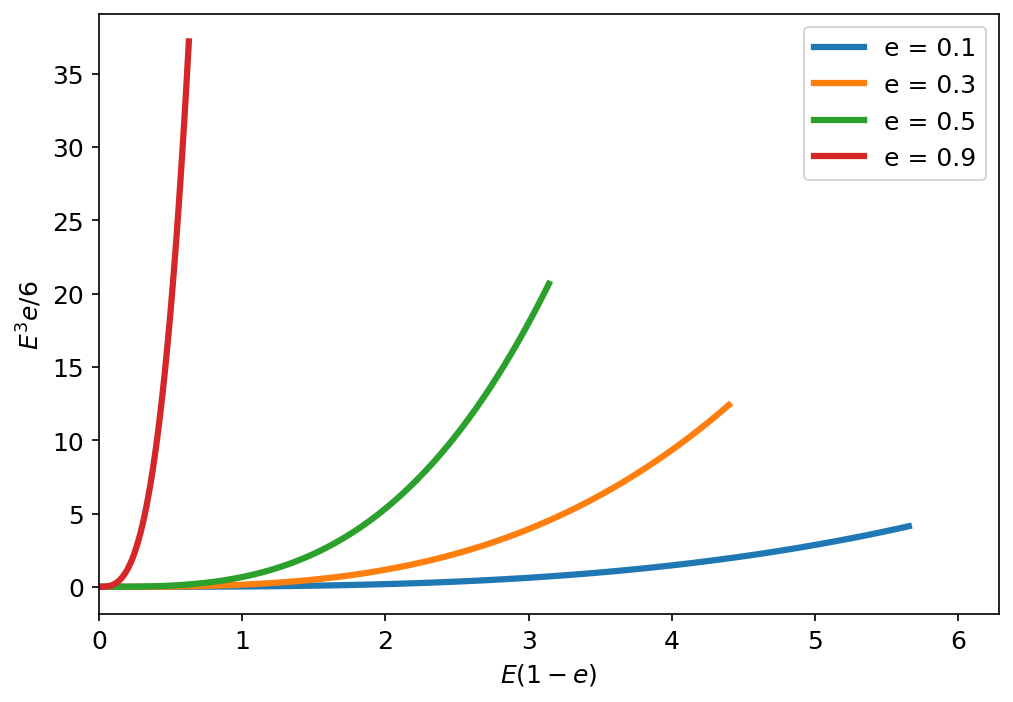

In [86]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

E1 = np.linspace(0,2*np.pi,100)
es = [0.1,0.3,0.5, 0.9]

for e1 in es:
    ax.plot(E1*(1-e1),E1**3*e1/6, linewidth=3, label="e = {}".format(e1)) 
ax.legend()
ax.set_xlim([0,2*np.pi])
ax.set_xlabel('$E(1-e)$');
ax.set_ylabel('$E^3e/6$');

How can we use this to choose an initial condition? Let's assume that one or the other term is always dominant.  In that case, we can approximate:
$$M \approx E(1-e) \quad \Longrightarrow \quad E \approx \frac{M}{1-e}$$
or
$$M \approx \frac{E^3e}{6} \quad \Longrightarrow \quad E \approx \left(\frac{6M}{e}\right)^{\frac{1}{3}}$$

The intersection between these two approximations occurs when
$$E(1-e) = \frac{E^3e}{6} \quad \Longrightarrow \quad E = \sqrt{\frac{6(1-e)}{e}}$$

When the approximation based on the first term is below this value, we wish to use it as our initial guess. Otherwise, we choose the approximation based on the second term:

$$E_0 = \begin{cases}
\dfrac{M}{1-e} & \dfrac{M}{1-e} < \sqrt{\frac{6(1-e)}{e}}\\
\left(\dfrac{6M}{e}\right)^{\frac{1}{3}} & \textrm{else}
\end{cases}$$

# Time to do some work

<div class="alert alert-block alert-warning">
<b>Exercise</b><br> Implement a function for evaluating the eccentric anomaly given the mean anomaly, eccentricity, and an initial guess. Your function should return the result and the number of iterations that were required. Test your function on multiple different cases and using the various initialization strategies described above.
</div>

In [ ]:
# Define a function to invert Kepler's time equation
def invKepler(M,e,E0):
    """
    Args:
        M (float):
            Mean anomaly (rad)
        e (float):
            Eccentricity (between 0 and 1)
        E0 (float):
            Initial guess for eccentric anomaly (rad)

    Returns:
        tuple:
            E (float):
                eccentric anomaly (rad)
            numIter (int):
                Number of iterations    
    """
    
    
    #write some code!
    
    
    
    
    return E, numIter

In [87]:
eps(10)

In [88]:
np.spacing(10)